Assignment 3.2

Date: 30/07/24

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 5)
# without a fixed seed (random_state), the randomness will yield different results on each execution.
# This can lead to variability in model evaluation results.

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# We use StandardScaler, which standardizes features by removing the mean and scaling to unit variance.
# This is appropriate since k-nearest neighbors models are sensitive to the scale of the data.

In [14]:
knn_uniform = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=11, weights='distance')

X_train_scaled_2d = X_train_scaled[:, :2]
X_test_scaled_2d = X_test_scaled[:, :2]

knn_uniform.fit(X_train_scaled_2d, y_train)
knn_distance.fit(X_train_scaled_2d, y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

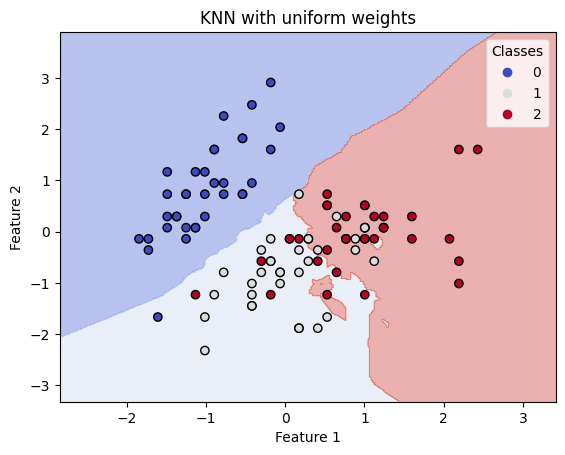

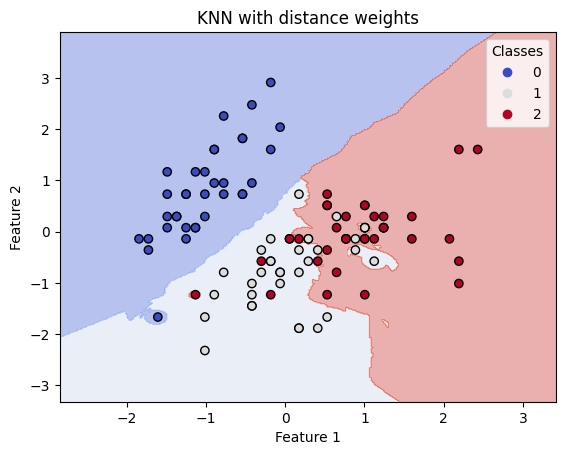

In [15]:
def plot_decision_boundaries(X, y, classifier, title):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    # meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundaries(X_train_scaled_2d, y_train, knn_uniform, 'KNN with uniform weights')
plot_decision_boundaries(X_train_scaled_2d, y_train, knn_distance, 'KNN with distance weights')
